In [32]:
import pandas as pd
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string




## Import data

In [33]:
df_data = pd.read_csv("data.csv", encoding="cp1252")
df_kamusalay = pd.read_csv('new_kamusalay.csv', encoding="cp1252", header=None)
df_kamusalay = df_kamusalay.rename(columns={0: 'alay', 1: 'normal'})
df_abusive = pd.read_csv('abusive.csv', encoding="cp1252")

In [34]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [35]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [36]:
df_data.shape

(13169, 13)

## Cek Duplikat Data

In [37]:
df_data.duplicated().sum()
#diketahui bahwa data yg duplikat sebanyak 125 ROW

125

In [38]:
#Normalisasi data yang duplikat
df_data = df_data.drop_duplicates()

In [39]:
#recheck data yg duplicate
df_data.duplicated().sum()
# hasil 0 berrarti duplicate data sudah di bersihkan


0

## Check Missing Value

In [40]:
df_data.isnull()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df_data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

## Function untuk cleaning

In [42]:
#cleaning data tweet
def clean_text(text):
    #menghapus username twitter
    text = re.sub('@[^\s]+', ' ', text)
    #menghapus https dan http
    text = re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', text)
    #mengganti karakter html dengan tanda petik
    text = re.sub('<.*?>', ' ', text)
    #mempertimbangkan huruf dan nama
    text = re.sub('[^a-zA-Z]', ' ', text)
    #mengganti line baru dengan spasi
    text = re.sub('\n', ' ', text)
    #mengubah ke huruf kecil
    text = text.lower()
    #menghapus single char
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)
    #memisahkan dan menggabungkan kata
    text = ' '.join(text.split())
    #menghapus link picture
    text = re.sub(r'pic.twitter.com.[\w]+', '', text)
    #menghapus username
    text = re.sub('user',' ', text)
    #menghapus RT simbol
    text = re.sub('RT',' ',text)
    return text

## Explorasi untuk menghilangkan kata alay dari data tweet

In [43]:
df_kamusalay

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [44]:
kamusalay = dict(zip(df_kamusalay['alay'], df_kamusalay['normal']))
def alay_to_normal(text):
    for word in kamusalay:
        return ' '.join([kamusalay[word] if word in kamusalay else word for word in text.split(' ')])

df_data['Tweet_Normalisasi_Alay'] = df_data['Tweet'].apply(alay_to_normal)
df_data['Tweet_Normalisasi_Alay'].apply(clean_text)

df_data['Tweet_Normalisasi_Alay'].head(10)

0    - di saat semua cowok berusaha melacak perhati...
1    RT USER: USER siapa yang telat memberi tau elu...
2    41. Kadang aku berfikir, kenapa aku tetap perc...
3    USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4    USER USER Kaum cebong kafir sudah kelihatan do...
5    USER Ya bani taplak dan kawan kawan \xf0\x9f\x...
6    deklarasi pilihan kepala daerah 2018 aman dan ...
7    Gue baru saja selesai re-watch Aldnoah Zero!!!...
8    Nah admin belanja satu lagi port terbaik nak m...
9                   USER Enak lagi kalau sambil ngewe'
Name: Tweet_Normalisasi_Alay, dtype: object

## Mengecek dan sortir kolom yang dibutuhkan

In [45]:
df_data = df_data[["Tweet_Normalisasi_Alay", "HS", "Abusive"]]
df_data.duplicated().sum()

14

In [46]:
df_data = df_data.drop_duplicates()
df_data.shape


(13030, 3)

In [47]:
#abusive 
list_abusive = df_abusive['ABUSIVE'].str.lower().tolist()
def normalize_abusive(text):
    list_word = text.split()
    return ' '.join([text for text in list_word if text not in list_abusive])

df_data['Tweet_Normalisasi_Abusive'] = df_data['Tweet_Normalisasi_Alay'].apply(normalize_abusive)
df_data['Tweet_Normalisasi_Abusive'].head(10)

0    - di saat semua cowok berusaha melacak perhati...
1    RT USER: USER siapa yang telat memberi tau elu...
2    41. Kadang aku berfikir, kenapa aku tetap perc...
3    USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4    USER USER Kaum sudah kelihatan dongoknya dari ...
5    USER Ya dan kawan kawan \xf0\x9f\x98\x84\xf0\x...
6    deklarasi pilihan kepala daerah 2018 aman dan ...
7    Gue baru saja selesai re-watch Aldnoah Zero!!!...
8    Nah admin belanja satu lagi port terbaik nak m...
9                   USER Enak lagi kalau sambil ngewe'
Name: Tweet_Normalisasi_Abusive, dtype: object

In [48]:
#label tweet
#Memisahkan label tweet
def tweet(text):
    if text['HS'] == 1 and text['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif text['HS'] == 1 and text['Abusive'] == 0:
        return 'Hate Speech'
    elif text['HS'] == 0 and text['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'Neutral'

In [49]:
#aplikasikan fungsi labelling ke dataset
df_data['label'] = df_data.apply(tweet, axis=1)

In [50]:
#checking data
df_data.head(10)

,Tweet_Normalisasi_Alay,HS,Abusive,Tweet_Normalisasi_Abusive,label
0,- di saat semua cowok berusaha melacak perhati...,1,1,- di saat semua cowok berusaha melacak perhati...,Hate Speech & Abusive
1,RT USER: USER siapa yang telat memberi tau elu...,0,1,RT USER: USER siapa yang telat memberi tau elu...,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,"41. Kadang aku berfikir, kenapa aku tetap perc...",Neutral
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,Neutral
4,USER USER Kaum cebong kafir sudah kelihatan do...,1,1,USER USER Kaum sudah kelihatan dongoknya dari ...,Hate Speech & Abusive
5,USER Ya bani taplak dan kawan kawan \xf0\x9f\x...,1,1,USER Ya dan kawan kawan \xf0\x9f\x98\x84\xf0\x...,Hate Speech & Abusive
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,deklarasi pilihan kepala daerah 2018 aman dan ...,Neutral
7,Gue baru saja selesai re-watch Aldnoah Zero!!!...,0,1,Gue baru saja selesai re-watch Aldnoah Zero!!!...,Abusive
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,Nah admin belanja satu lagi port terbaik nak m...,Neutral
9,USER Enak lagi kalau sambil ngewe',0,1,USER Enak lagi kalau sambil ngewe',Abusive


In [51]:
#Menghitung jumlah klasifikasi tweet berdasarkan label
df_data['label'].value_counts()

label
Neutral                  5782
Hate Speech & Abusive    3254
Hate Speech              2252
Abusive                  1742
Name: count, dtype: int64

<Axes: ylabel='label'>

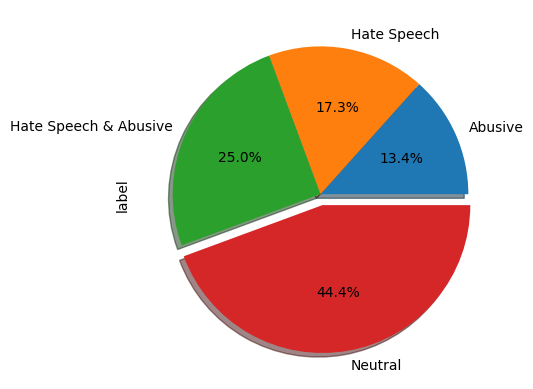

In [52]:
#Data Visualisasi
explode = [0, 0, 0, 0.075]
presentase_sentiment = df_data.groupby("label").label.count()
presentase_sentiment.plot(kind = 'pie', autopct = '%1.1f%%', explode = explode, shadow = True)

## Membandingkan jumlah kata dari setiap label dalam suatu tweet

In [53]:
#Membuat Kolom  Total Word
df_data["Total_Word"] = df_data['Tweet_Normalisasi_Alay'].apply(lambda x: len(x.split()))
df_data.head()

,Tweet_Normalisasi_Alay,HS,Abusive,Tweet_Normalisasi_Abusive,label,Total_Word
0,- di saat semua cowok berusaha melacak perhati...,1,1,- di saat semua cowok berusaha melacak perhati...,Hate Speech & Abusive,26
1,RT USER: USER siapa yang telat memberi tau elu...,0,1,RT USER: USER siapa yang telat memberi tau elu...,Abusive,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,"41. Kadang aku berfikir, kenapa aku tetap perc...",Neutral,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,Neutral,14
4,USER USER Kaum cebong kafir sudah kelihatan do...,1,1,USER USER Kaum sudah kelihatan dongoknya dari ...,Hate Speech & Abusive,14


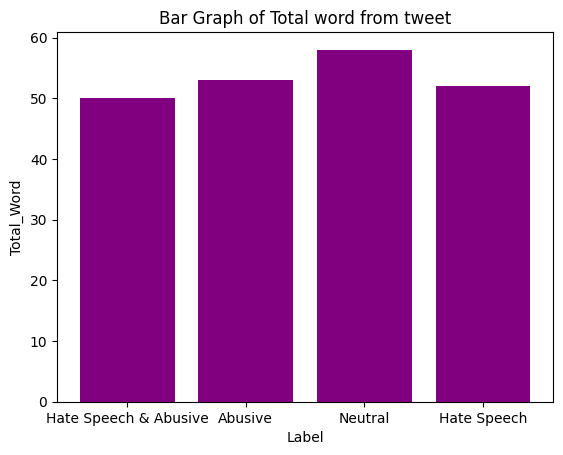

In [55]:
#Visualisasi Bar Graph
divisions = df_data["label"]
division_average_marks = df_data["Total_Word"] 

plt.bar(divisions, division_average_marks, color='purple')
plt.title("Bar Graph of Total word from tweet") 
plt.xlabel("Label")
plt.ylabel("Total_Word")

plt.show()